# TSF TASK 4 (EDA of Terrorism)

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url="https://bit.ly/2TK5Xn5"

In [154]:
df = pd.read_excel (r'global_terrorism.xls')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231
0,197000000001,1970,7,2,NaN,0,NaN,58.0,Dominican Republic,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130.0,Mexico,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160.0,Philippines,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78.0,Greece,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101.0,Japan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50469,199203110001,1992,3,11,NaN,0,NaN,159.0,Peru,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50470,199203110002,1992,3,11,NaN,0,NaN,159.0,Peru,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50471,199203110003,1992,3,11,NaN,0,NaN,183.0,South Africa,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50472,199203110004,1992,3,11,NaN,0,NaN,183.0,South Africa,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [156]:
df.drop(df.columns[135:232], axis=1, inplace=True)

In [157]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    50448
              ...  
INT_LOG        9116
INT_IDEO       4786
INT_MISC       2758
INT_ANY        1756
related       29852
Length: 135, dtype: int64

In [158]:
p=df.columns.tolist()
q=df.isnull().sum().tolist()

In [159]:
d = {p[i]: q[i] for i in range(0, len(p))}

In [160]:
removed_column=["eventid","approxdate",'resolution','location','summary','alternative','alternative_txt','attacktype2','attacktype2_txt',
                'attacktype3','attacktype3_txt','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2',
               'natlty2','natlty2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','targtype3',
               'targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','natlty3','natlty3_txt',
               'gsubname','gname2','gsubname2','gname3','gsubname3', 'motive','guncertain2','guncertain3',
               'nperps','nperpcap','claimed','claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt',
                'claim3','claimmode3','claimmode3_txt','compclaim','weaptype2' ,'weaptype2_txt','weapsubtype2' ,
                'weapsubtype2_txt', 'weaptype3','weaptype3_txt','weapsubtype3','weapsubtype3_txt','weaptype4', 'weaptype4_txt' ,
                'weapsubtype4', 'weapsubtype4_txt','nkillus','nkillter','nwoundus','nwoundte', 'propvalue', 'propcomment', 
                'nhostkid', 'nhostkidus', 'nhours' ,'ndays', 'divert','kidhijcountry', 'ransomamt','ransomamtus','ransompaid',
                'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1','scite2',
                'scite3','targtype2',"corp1",'related' ,'dbsource','ransom','propextent','propextent_txt',"country","region",
               "extended","crit1","crit2","crit3","gname","INT_LOG","INT_IDEO","INT_MISC","INT_ANY",
               'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
             'weapdetail',"natlty1","guncertain1","individual"]

In [161]:
df.drop([col for col in removed_column ], axis=1, inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50474 entries, 0 to 50473
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             50474 non-null  int64  
 1   imonth            50474 non-null  int64  
 2   iday              50474 non-null  int64  
 3   country_txt       50474 non-null  object 
 4   region_txt        50474 non-null  object 
 5   provstate         50265 non-null  object 
 6   city              50474 non-null  object 
 7   latitude          47726 non-null  object 
 8   longitude         47723 non-null  float64
 9   specificity       50471 non-null  float64
 10  vicinity          50474 non-null  int64  
 11  doubtterr         50474 non-null  object 
 12  multiple          50181 non-null  object 
 13  success           49971 non-null  object 
 14  suicide           50069 non-null  object 
 15  attacktype1       50229 non-null  object 
 16  attacktype1_txt   50301 non-null  object

In [163]:
df["specificity"]=df['specificity'].fillna("1")
df["provstate"]=df['provstate'].fillna("Northern Ireland")
df["latitude"]=df['latitude'].fillna("-11.967368")
df["longitude"]=df['longitude'].fillna("-76.978462")
df["vicinity"]=df['vicinity'].fillna("0")
df["doubtterr"]=df['doubtterr'].fillna("0")
df["multiple"]=df['multiple'].fillna("0")
df["success"]=df['success'].fillna("1")
df["suicide"]=df['suicide'].fillna("0")
df["attacktype1"]=df['attacktype1'].fillna("3")
df["attacktype1_txt"]=df['attacktype1_txt'].fillna("Bombing/Explosion")
df["targtype1"]=df['targtype1'].fillna("1")
df["targtype1_txt"]=df['targtype1_txt'].fillna("Business")
df["targsubtype1"]=df['targsubtype1'].fillna("29")
df["targsubtype1_txt"]=df['targsubtype1_txt'].fillna("Military Unit/Patrol/Convoy ")
df["target1"]=df['target1'].fillna("Military Unit ")
df["natlty1_txt"]=df['natlty1_txt'].fillna("El Salvador")
df["nkill"]=df['nkill'].fillna("0")
df["nwound"]=df['nwound'].fillna("0")
df["property"]=df['property'].fillna("1")
df["ishostkid"]=df['ishostkid'].fillna("0")

In [165]:
# determining the name of the file
file_name = 'updated_terrorism.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.') 

DataFrame is written to Excel File successfully.


In [168]:
pd.set_option("display.max_columns",None)
df.head()


,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1_txt,nkill,nwound,property,ishostkid
0,1970,7,2,Dominican Republic,Central America & Caribbean,Northern Ireland,Santo Domingo,18.456792,-69.951164,1.0,0,0,0,1,0,1,Assassination,14,Private Citizens & Property,68,Named Civilian,Julio Guzman,Dominican Republic,1,0,0,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45,Diplomatic Personnel (outside of embassy,Belgian Ambassador Daughter,daughter,0,0,1,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,0,1,Assassination,10,Journalists & Media,54,Radio Journalist/Staff/Facility,Employee,United States,1,0,0,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.99749,23.762728,1.0,0,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46,Embassy/Consulate,U.S. Embassy,United States,0,0,1,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,-9,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46,Embassy/Consulate,U.S. Consulate,United States,0,0,1,0


In [186]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'specificity', 'vicinity', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'target1', 'natlty1_txt'],
      dtype='object')

In [169]:
df=df.drop(["provstate","latitude","longitude","attacktype1","targtype1","targsubtype1","doubtterr","multiple","success",
            "suicide","nkill","nwound","property","ishostkid"], axis=1)

In [184]:
df[["ishostkid"]].value_counts()

ishostkid                  
0                              32127
0                              12896
1                               2458
Minor (likely < $1 million)      306
3                                222
                               ...  
 damaged masonry (hotel)           1
 damaged memorial                  1
 damaged microbus                  1
 damaged military patrol           1
truck and residence                1
Length: 1109, dtype: int64

In [187]:
df

,iyear,imonth,iday,country_txt,region_txt,city,specificity,vicinity,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1.0,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic
1,1970,0,0,Mexico,North America,Mexico city,1.0,0,Hostage Taking (Kidnapping),Government (Diplomatic),Diplomatic Personnel (outside of embassy,Belgian Ambassador Daughter,daughter
2,1970,1,0,Philippines,Southeast Asia,Unknown,4.0,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States
3,1970,1,0,Greece,Western Europe,Athens,1.0,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States
4,1970,1,0,Japan,East Asia,Fukouka,1.0,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50469,1992,3,11,Peru,South America,Lima,1.0,0,Assassination,Government (General),Government Personnel (excluding police,government,159
50470,1992,3,11,Peru,South America,Tornameza,1.0,0,Assassination,Business,Military Unit/Patrol/Convoy,Businessman,Peru
50471,1992,3,11,South Africa,Sub-Saharan Africa,Longdale,1.0,0,Assassination,Transportation,Train/Train Tracks/Trolley,commuters at Longdale railway station,South Africa
50472,1992,3,11,South Africa,Sub-Saharan Africa,Germiston,1.0,1,Assassination,Transportation,Train/Train Tracks/Trolley,3 persons on commuter train,South Africa


In [215]:
print("Country with the most attacks:",df['country_txt'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Peru
City with the most attacks: Lima
Region with the most attacks: South America
Year with the most attacks: 1991
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion


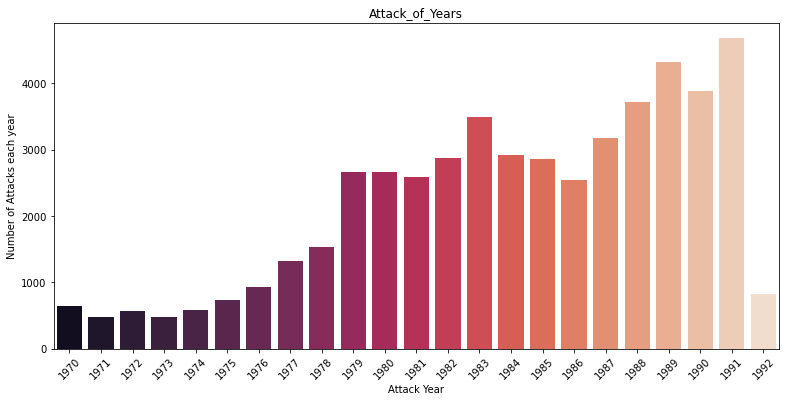

In [203]:
x_year = df['iyear'].unique()
y_count_years = df['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (13,6))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

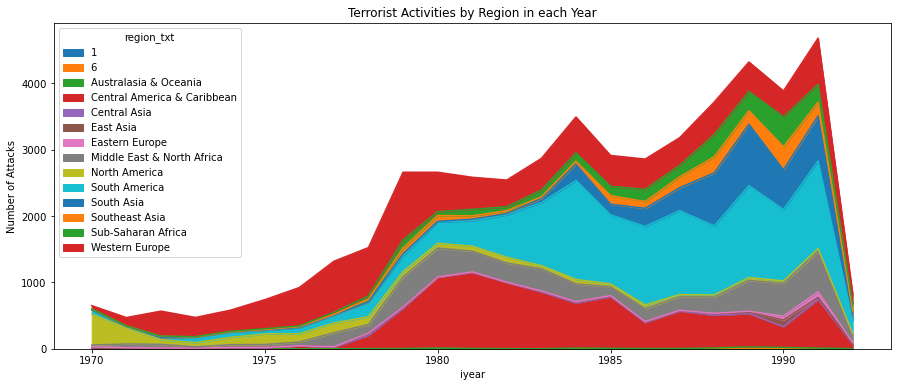

In [205]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


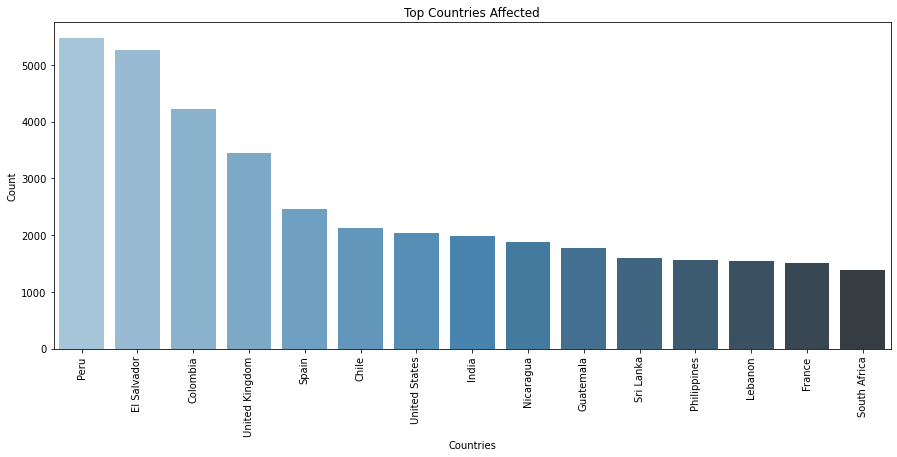

In [207]:
#top contries effected
plt.subplots(figsize=(15,6))
sns.barplot(df['country_txt'].value_counts()[:15].index,df['country_txt'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


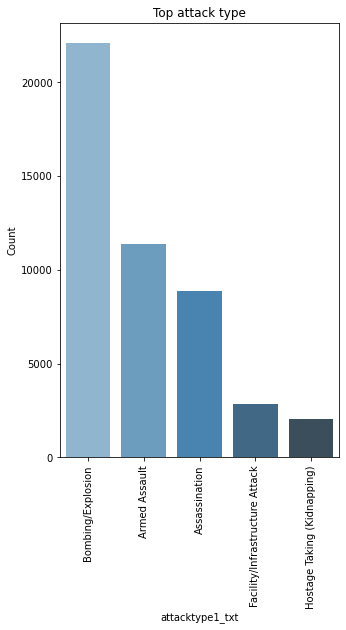

In [222]:
plt.subplots(figsize=())
sns.barplot(df['attacktype1_txt'].value_counts()[:5].index,df['attacktype1_txt'].value_counts()[:5].values,palette='Blues_d')
plt.title('Top attack type')
plt.xlabel('attacktype1_txt')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()